In [1]:
# Import dependencies
import pandas as pd
from scipy.misc import imread
import arrow
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = '4nyydq5k_sPU89Nkvi_Q'

In [3]:
# Make calls to the quandl API to get the stock data for our five chosen stocks, for only the variables of interests, for only the first quarter, and put into stock df 
all_stock = quandl.get_table('WIKI/PRICES', ticker=["AAPL", "AMZN", "FB", "SBUX", "TWTR"], 
                             qopts={"columns":["date", "ticker","adj_open","adj_close","adj_volume"]},
                             date = {'gte': '2018-01-01', 'lte': '2018-03-31'}, paginate=True)

# Rename date column to make useful for future merges
all_stock = all_stock.rename(columns={'date':'Date'})
all_stock.head()

,Date,ticker,adj_open,adj_close,adj_volume
None,,,,,
0,2018-01-02,AAPL,170.16,172.26,25048048.0
1,2018-01-03,AAPL,172.53,172.23,28819653.0
2,2018-01-04,AAPL,172.54,173.03,22211345.0
3,2018-01-05,AAPL,173.44,175.00,23016177.0
4,2018-01-08,AAPL,174.35,174.35,20134092.0


In [4]:
# Make calls using the FinSents API wrapper (through quandl) for our 5 chosen companies on the NASDAQ and put into sentiments df
all_sent = quandl.get(['NS1/AAPL_US', 'NS1/AMZN_US', 'NS1/FB_US',  'NS1/SBUX_US', 'NS1/TWTR_US'], start_date='2018-01-01', end_date='2018-03-31')

# Reset index to make the date column usable for later merges
all_sent = all_sent.reset_index()
all_sent.head()

,Date,NS1/AAPL_US - Sentiment,NS1/AAPL_US - Sentiment High,NS1/AAPL_US - Sentiment Low,NS1/AAPL_US - News Volume,NS1/AAPL_US - News Buzz,NS1/AMZN_US - Sentiment,NS1/AMZN_US - Sentiment High,NS1/AMZN_US - Sentiment Low,NS1/AMZN_US - News Volume,...,NS1/SBUX_US - Sentiment,NS1/SBUX_US - Sentiment High,NS1/SBUX_US - Sentiment Low,NS1/SBUX_US - News Volume,NS1/SBUX_US - News Buzz,NS1/TWTR_US - Sentiment,NS1/TWTR_US - Sentiment High,NS1/TWTR_US - Sentiment Low,NS1/TWTR_US - News Volume,NS1/TWTR_US - News Buzz
0,2018-01-01,4.0,5.0,4.0,19.0,2.0,0.0,0.0,0.0,0.0,...,3.0,5.0,-2.0,6.0,5.0,4.0,5.0,3.0,156.0,10.0
1,2018-01-02,4.0,5.0,3.0,49.0,3.0,0.0,0.0,0.0,0.0,...,4.0,5.0,3.0,3.0,1.0,4.0,5.0,2.0,151.0,6.0
2,2018-01-03,4.0,5.0,4.0,41.0,3.0,0.0,0.0,0.0,0.0,...,5.0,5.0,4.0,4.0,1.0,4.0,5.0,2.0,156.0,6.0
3,2018-01-04,4.0,5.0,4.0,21.0,2.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,3.0,1.0,4.0,5.0,2.0,104.0,4.0
4,2018-01-05,4.0,5.0,4.0,64.0,9.0,0.0,0.0,0.0,0.0,...,4.0,5.0,4.0,14.0,10.0,4.0,5.0,2.0,149.0,6.0


In [5]:
# Drop unnecessary columns from sentiments df
cols = [2,3,7,8,12,13,17,18,22,23]
all_sent.drop(all_sent.columns[cols],axis=1,inplace=True)
all_sent.head()

,Date,NS1/AAPL_US - Sentiment,NS1/AAPL_US - News Volume,NS1/AAPL_US - News Buzz,NS1/AMZN_US - Sentiment,NS1/AMZN_US - News Volume,NS1/AMZN_US - News Buzz,NS1/FB_US - Sentiment,NS1/FB_US - News Volume,NS1/FB_US - News Buzz,NS1/SBUX_US - Sentiment,NS1/SBUX_US - News Volume,NS1/SBUX_US - News Buzz,NS1/TWTR_US - Sentiment,NS1/TWTR_US - News Volume,NS1/TWTR_US - News Buzz
0,2018-01-01,4.0,19.0,2.0,0.0,0.0,0.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,156.0,10.0
1,2018-01-02,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-03,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
3,2018-01-04,4.0,21.0,2.0,0.0,0.0,0.0,4.0,10.0,3.0,4.0,3.0,1.0,4.0,104.0,4.0
4,2018-01-05,4.0,64.0,9.0,0.0,0.0,0.0,4.0,13.0,4.0,4.0,14.0,10.0,4.0,149.0,6.0


In [6]:
# Rename columns for readability 
all_sent_rename = all_sent.rename(index=str, columns={"NS1/AAPL_US - Sentiment": "AAPL Sentiment", 
                                    "NS1/AAPL_US - News Volume": "AAPL News Volume",
                                    "NS1/AAPL_US - News Buzz": "AAPL News Buzz",
                                    "NS1/AMZN_US - Sentiment": "AMZN Sentiment", 
                                    "NS1/AMZN_US - News Volume": "AMZN News Volume",
                                    "NS1/AMZN_US - News Buzz": "AMZN News Buzz",
                                    "NS1/FB_US - Sentiment": "FB Sentiment", 
                                    "NS1/FB_US - News Volume": "FB News Volume",
                                    "NS1/FB_US - News Buzz": "FB News Buzz",
                                    "NS1/SBUX_US - Sentiment": "SBUX Sentiment", 
                                    "NS1/SBUX_US - News Volume": "SBUX News Volume",
                                    "NS1/SBUX_US - News Buzz": "SBUX News Buzz",
                                    "NS1/TWTR_US - Sentiment": "TWTR Sentiment", 
                                    "NS1/TWTR_US - News Volume": "TWTR News Volume",
                                    "NS1/TWTR_US - News Buzz": "TWTR News Buzz"})
all_sent_rename.head()

,Date,AAPL Sentiment,AAPL News Volume,AAPL News Buzz,AMZN Sentiment,AMZN News Volume,AMZN News Buzz,FB Sentiment,FB News Volume,FB News Buzz,SBUX Sentiment,SBUX News Volume,SBUX News Buzz,TWTR Sentiment,TWTR News Volume,TWTR News Buzz
0,2018-01-01,4.0,19.0,2.0,0.0,0.0,0.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,156.0,10.0
1,2018-01-02,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-03,4.0,41.0,3.0,0.0,0.0,0.0,4.0,30.0,9.0,5.0,4.0,1.0,4.0,156.0,6.0
3,2018-01-04,4.0,21.0,2.0,0.0,0.0,0.0,4.0,10.0,3.0,4.0,3.0,1.0,4.0,104.0,4.0
4,2018-01-05,4.0,64.0,9.0,0.0,0.0,0.0,4.0,13.0,4.0,4.0,14.0,10.0,4.0,149.0,6.0


In [7]:
# Subset data into new df for variable: Sentiment
sent_only = all_sent_rename[["Date","AAPL Sentiment", "AMZN Sentiment", "FB Sentiment", "SBUX Sentiment", "TWTR Sentiment"]]
sent_only.head()

,Date,AAPL Sentiment,AMZN Sentiment,FB Sentiment,SBUX Sentiment,TWTR Sentiment
0,2018-01-01,4.0,0.0,4.0,3.0,4.0
1,2018-01-02,4.0,0.0,4.0,4.0,4.0
2,2018-01-03,4.0,0.0,4.0,5.0,4.0
3,2018-01-04,4.0,0.0,4.0,4.0,4.0
4,2018-01-05,4.0,0.0,4.0,4.0,4.0


In [8]:
# Subset data into new df for variable: News volume
news_vol_only = all_sent_rename[["Date","AAPL News Volume", "AMZN News Volume", "FB News Volume", "SBUX News Volume", "TWTR News Volume"]]

# Set date as index for graphing
news_vol_only = news_vol_only.set_index("Date")
#news_vol_only.head()

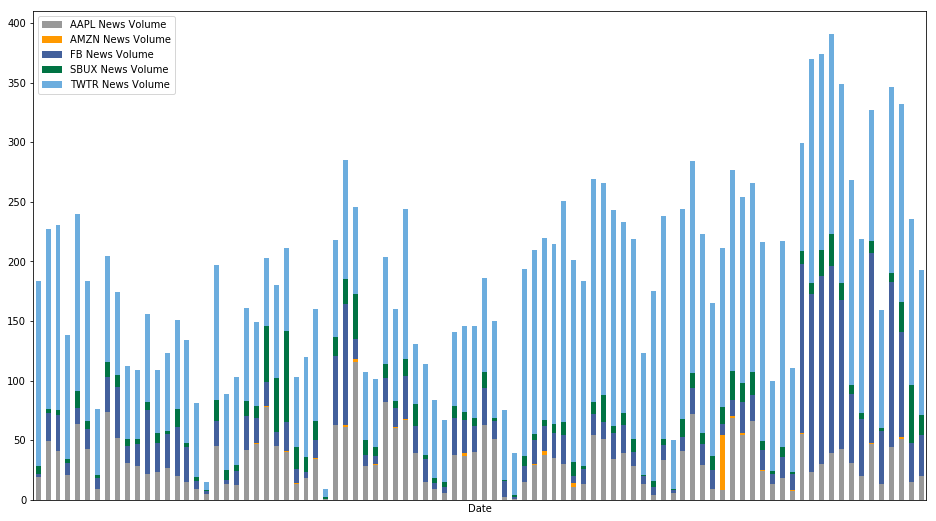

In [9]:
# Create plot for variable: News volume
colors = ['#999999', '#FF9900', '#43609C', '#007343', '#6CADDE']
plt.rcParams["figure.figsize"] = [16,9]
news_vol_only.plot.bar(stacked=True, color = colors)
plt.tick_params(axis='x', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')

# Save the figure as png image 
plt.savefig("News_volume.png")

# Display the graph
plt.show()

In [10]:
# Subset data into new df for variable: News buzz
buzz_only = all_sent_rename[["Date","AAPL News Buzz", "AMZN News Buzz", "FB News Buzz", "SBUX News Buzz", "TWTR News Buzz"]]

# Set date as index for graphing
buzz_only = buzz_only.set_index("Date")
buzz_only.head()

,AAPL News Buzz,AMZN News Buzz,FB News Buzz,SBUX News Buzz,TWTR News Buzz
Date,,,,,
2018-01-01,2.0,0.0,4.0,5.0,10.0
2018-01-02,3.0,0.0,7.0,1.0,6.0
2018-01-03,3.0,0.0,9.0,1.0,6.0
2018-01-04,2.0,0.0,3.0,1.0,4.0
2018-01-05,9.0,0.0,4.0,10.0,6.0


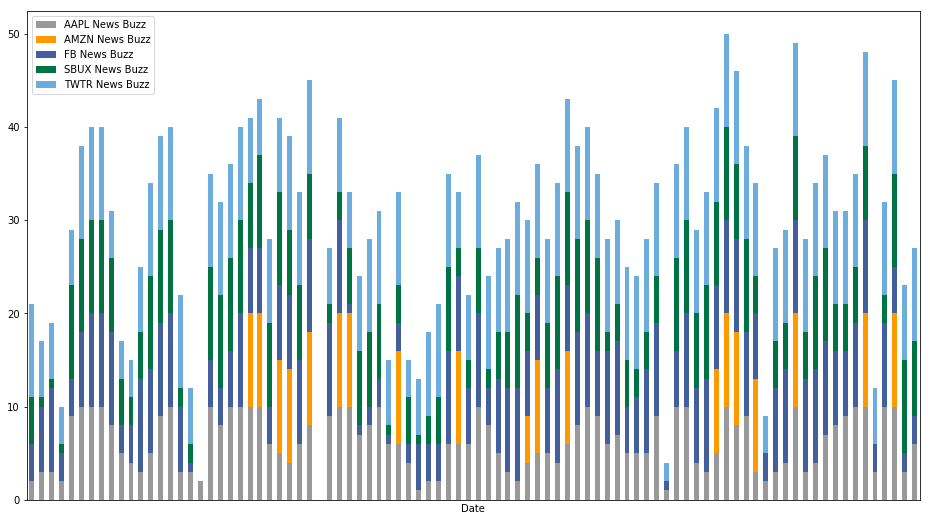

In [11]:
# Create plot for variable: News buzz
# Need to label axes and title graph
colors = ['#999999', '#FF9900', '#43609C', '#007343', '#6CADDE']
plt.rcParams["figure.figsize"] = [16,9]


buzz_only.plot.bar(stacked=True, color = colors)
plt.tick_params(axis='x', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
# Save the figure as png image 
plt.savefig("News_buzz.png")


plt.show()


In [12]:
# Merge the stock data with the sentiments data 
merge_df = all_stock.merge(all_sent_rename, on="Date", how="outer")
merge_df.head()

,Date,ticker,adj_open,adj_close,adj_volume,AAPL Sentiment,AAPL News Volume,AAPL News Buzz,AMZN Sentiment,AMZN News Volume,AMZN News Buzz,FB Sentiment,FB News Volume,FB News Buzz,SBUX Sentiment,SBUX News Volume,SBUX News Buzz,TWTR Sentiment,TWTR News Volume,TWTR News Buzz
0,2018-01-02,AAPL,170.16,172.26,25048048.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
1,2018-01-02,AMZN,1172.00,1189.01,2587899.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
2,2018-01-02,FB,177.68,181.42,17694891.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
3,2018-01-02,SBUX,57.95,57.63,7199959.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0
4,2018-01-02,TWTR,24.07,24.51,15283036.0,4.0,49.0,3.0,0.0,0.0,0.0,4.0,24.0,7.0,4.0,3.0,1.0,4.0,151.0,6.0


In [13]:
# Change the variable names so that the merged df can be split by ticker names
stocks = ["AMZN", "FB", "SBUX", "TWTR", "AAPL"]

print("Creating the following dataframes:")

# Loop through the tickers and dynamically change the variable names; store them in their own dataframes
for s in range(len(stocks)): 
    globals()['%s_df' % stocks[s]] = merge_df[merge_df.iloc[:, 1] == stocks[s]]
    print('%s_df' % stocks[s])

# Verify 
#FB_df.head()

Creating the following dataframes:
AMZN_df
FB_df
SBUX_df
TWTR_df
AAPL_df


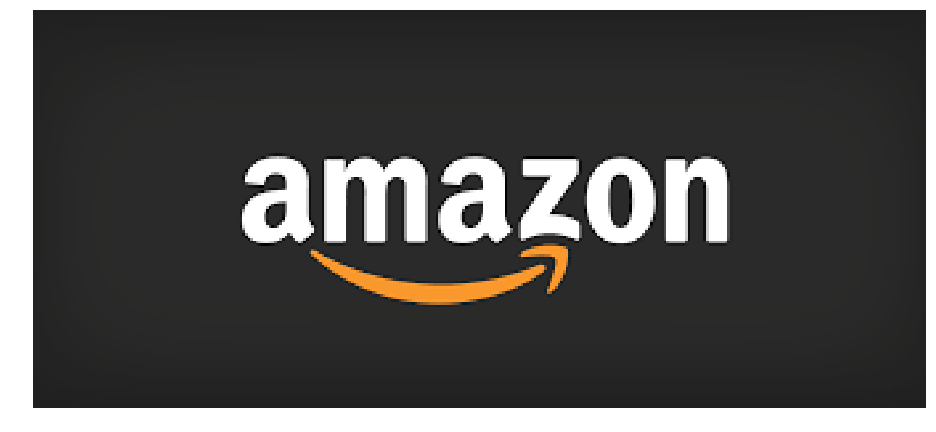

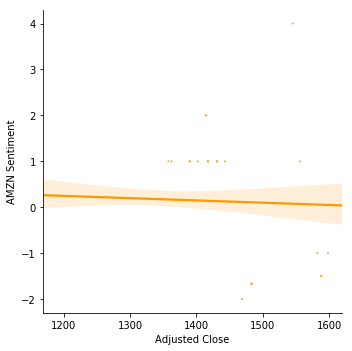

In [14]:
# Create a scatterplot for Amazon/Sentiment/Volume
image = plt.imread('AMZLOGO.png')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='AMZN Sentiment', fit_reg=True, line_kws={'color': '#FF9900'}, scatter_kws={'color': '#FF9900','s': AMZN_df['AMZN News Volume']},data=AMZN_df).set_axis_labels("Adjusted Close", "AMZN Sentiment")

# Save the figure as png image 
plt.savefig("AMZN_close_vs_sentiment.png")

# Display the logo and graph
plt.show()

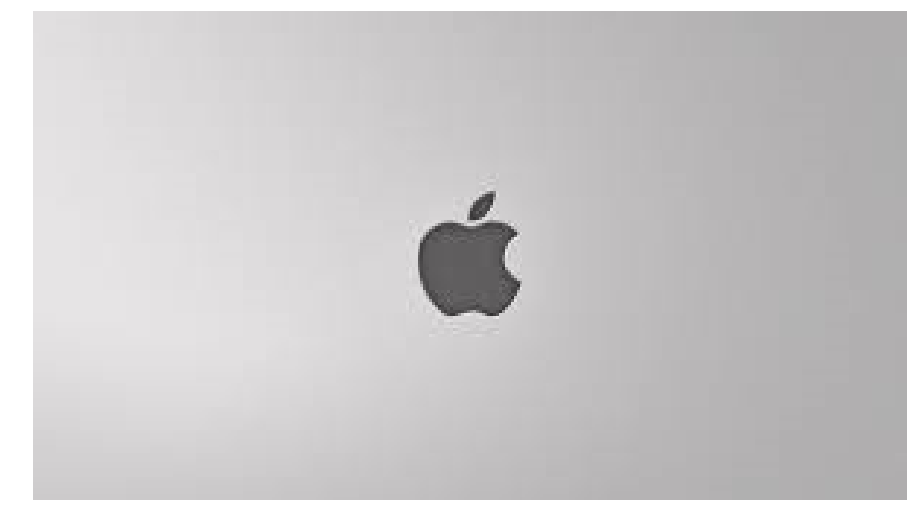

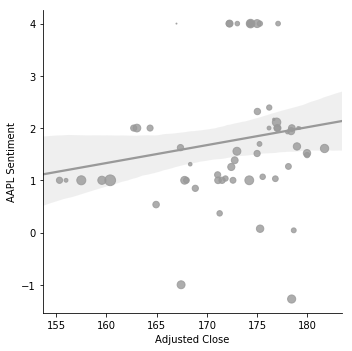

In [15]:
# Create a scatterplot for Apple/Sentiment/Volume
image = plt.imread('AAPLLOGO.png')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='AAPL Sentiment',
           fit_reg=True, line_kws={'color': '#999999'}, scatter_kws={'color': '#999999', 's': AAPL_df['AAPL News Volume']},data=AAPL_df
           ).set_axis_labels("Adjusted Close", "AAPL Sentiment")

# Save the figure as png image 
plt.savefig("apple_close_vs_sentiment.png")

# Display the logo and graph
plt.show()

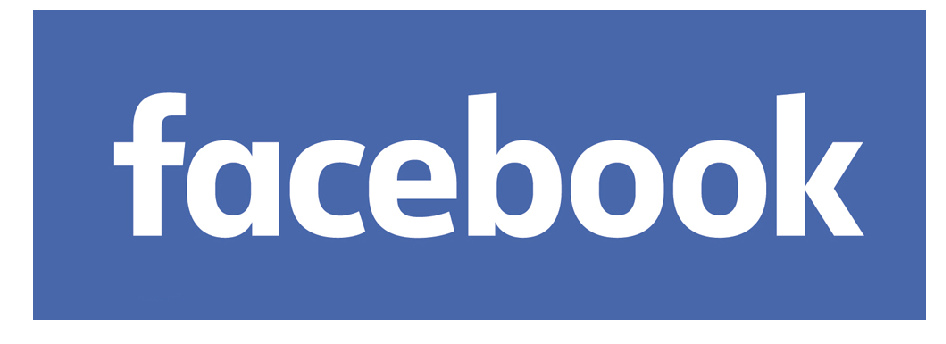

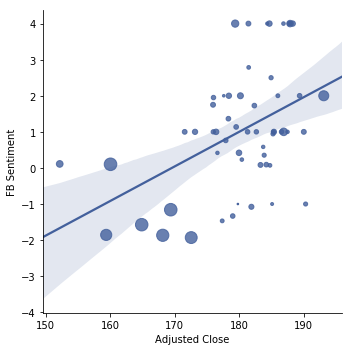

In [16]:
# Create a scatterplot for Facebook/Sentiment/Volume
image = plt.imread('FBLOGO.png')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='FB Sentiment',
           fit_reg=True, line_kws={'color': '#43609C'}, scatter_kws={'color': '#43609C', 's': FB_df['FB News Volume']},data=FB_df
           ).set_axis_labels("Adjusted Close", "FB Sentiment")

# Save the figure as png image 
plt.savefig("facebook_close_vs_sentiment.png")

# Display the logo and graph
plt.show()

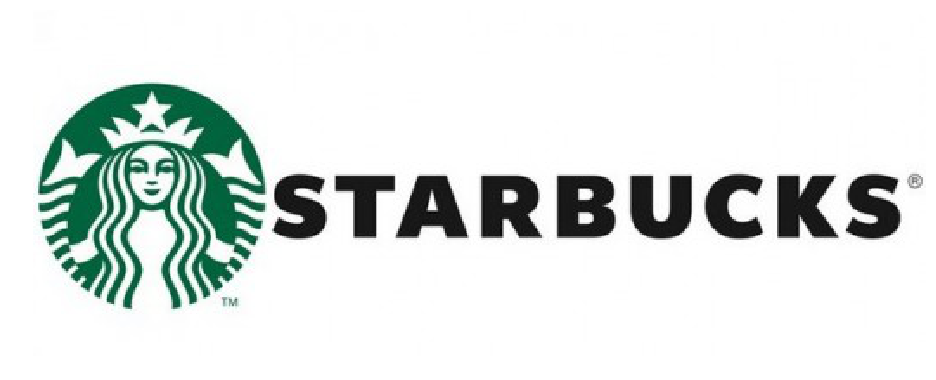

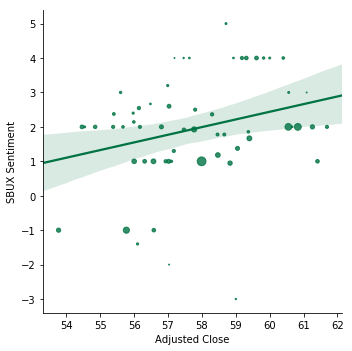

In [17]:
# Create a scatterplot for Starbucks/Sentiment/Volume
image = plt.imread('STBLOGO.jpg')
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='SBUX Sentiment', 
           fit_reg=True, line_kws={'color': '#007343'}, scatter_kws={'color': '#007343', 's': SBUX_df['SBUX News Volume']},data=SBUX_df
           ).set_axis_labels("Adjusted Close", "SBUX Sentiment")

# Save the figure as png image 
plt.savefig("starbucks_close_vs_sentiment.png")

# Display the logo and graph
plt.show()

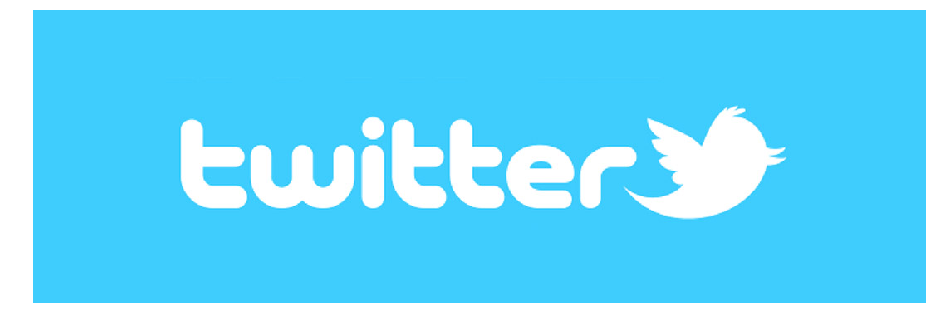

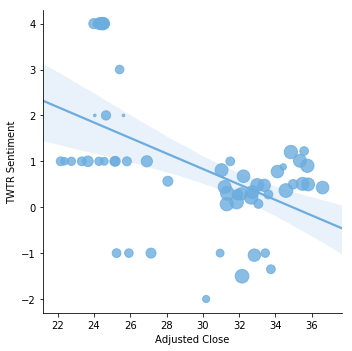

In [18]:
# Create scatter plot for Twitter/Sentiment/Volume
image = plt.imread("TWTRLOGO.JPG")
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off') 
sns.lmplot(x='adj_close', y='TWTR Sentiment',
           fit_reg=True, line_kws={'color': '#6CADDE'}, scatter_kws={'color': '#6CADDE', 's': TWTR_df['TWTR News Volume']},data=TWTR_df
           ).set_axis_labels("Adjusted Close", "TWTR Sentiment")

# Save the figure as png image 
plt.savefig("twitter_close_vs_sentiment.png")

# Display the logo and graph
plt.show()